# WITH PANDAS AND MATPLOTLIB

In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
import warnings
warnings.filterwarnings('ignore') 

INSTRUCTIONS

1. Number of people by gender
1. Kill weapon
1. Age of killed people
1. Race of killed people
1. Killed People According to Races (Pie Chart)
1. Most common 15 Name or Surname of killed people

<br>

read data

if didn't work you can use this parameters: encoding="windows-1252"

In [2]:
kill = pd.read_csv('PoliceKillingsUS.csv', encoding="windows-1252")

## 1: Plot number of people by gender

In [3]:
kill.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [4]:
kill.info()  # eksik veri olanlar >>>>>> armed, age, race, flee

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2535 entries, 0 to 2534
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       2535 non-null   int64  
 1   name                     2535 non-null   object 
 2   date                     2535 non-null   object 
 3   manner_of_death          2535 non-null   object 
 4   armed                    2526 non-null   object 
 5   age                      2458 non-null   float64
 6   gender                   2535 non-null   object 
 7   race                     2340 non-null   object 
 8   city                     2535 non-null   object 
 9   state                    2535 non-null   object 
 10  signs_of_mental_illness  2535 non-null   bool   
 11  threat_level             2535 non-null   object 
 12  flee                     2470 non-null   object 
 13  body_camera              2535 non-null   bool   
dtypes: bool(2), float64(1), 

In [5]:
kill.describe()

,id,age
count,2535.000000,2458.000000
mean,1445.731755,36.605370
std,794.259490,13.030774
min,3.000000,6.000000
25%,768.500000,26.000000
50%,1453.000000,34.000000
75%,2126.500000,45.000000
max,2822.000000,91.000000


In [6]:
kill.describe(include="object")

,name,date,manner_of_death,armed,gender,race,city,state,threat_level,flee
count,2535,2535,2535,2526,2535,2340,2535,2535,2535,2470
unique,2481,879,2,68,2,6,1417,51,3,4
top,TK TK,24/01/17,shot,gun,M,W,Los Angeles,CA,attack,Not fleeing
freq,49,8,2363,1398,2428,1201,39,424,1611,1695


In [7]:
a = list(kill.gender.value_counts())
a

[2428, 107]

In [8]:
b = kill.gender.value_counts().index
b

Index(['M', 'F'], dtype='object')

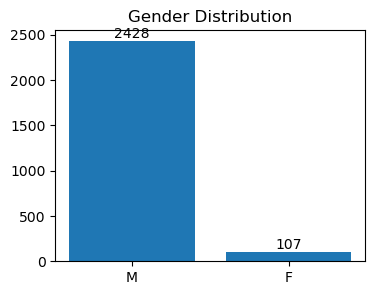

In [9]:
fig,ax = plt.subplots(figsize=(4,3))
ax.bar(b,a)
ax.set_title("Gender Distribution")
plt.text(0,a[0],str(a[0]),ha='center',va='bottom')
plt.text(1,a[1],str(a[1]),ha='center',va='bottom')
plt.show()

## 2: Plot 7 most common kill weapons

In [10]:
armed_value = pd.Series(kill.armed.value_counts()[:7])
armed_value

gun               1398
knife              373
vehicle            177
unarmed            171
undetermined       117
toy weapon         104
unknown weapon      18
Name: armed, dtype: int64

In [11]:
armed_index = list(kill.armed.value_counts()[:7].index)
armed_index

['gun',
 'knife',
 'vehicle',
 'unarmed',
 'undetermined',
 'toy weapon',
 'unknown weapon']

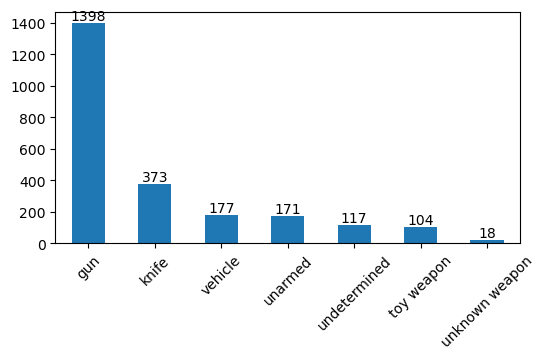

In [12]:

plt.figure(figsize=(6, 3))

ax = armed_value.plot(kind="bar")
ax.set_xticklabels(armed_index,rotation=45)
for i in range(len(armed_index)):
    plt.text(i,armed_value[i],str(armed_value[i]),ha='center',va='bottom')

# bar üstündeki değerler ? 
plt.show()

## 3: Plot number of age of killed people under two groups : Under 25 and Above 25

In [13]:
kill.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [14]:
kill["age_cat"] = kill.age.apply(lambda x: "above25" if x > 25 else "below25")
kill.age_cat

0       above25
1       above25
2       below25
3       above25
4       above25
         ...   
2530    above25
2531    below25
2532    above25
2533    above25
2534    above25
Name: age_cat, Length: 2535, dtype: object

In [15]:
kill.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,age_cat
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,above25
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,above25
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,below25
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,above25
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False,above25


In [16]:
kill.age_cat.value_counts()

above25    1905
below25     630
Name: age_cat, dtype: int64

In [17]:
age_index = list(kill.age_cat.value_counts().index)
age_index

['above25', 'below25']

In [18]:
age_cat_count = pd.Series(list(kill.age_cat.value_counts()))
age_cat_count

0    1905
1     630
dtype: int64

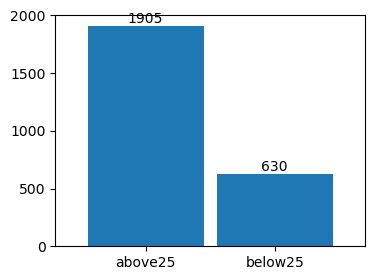

In [19]:
plt.figure(figsize=(4,3))
ax= fig.add_axes([0,0,1,1])
ax= age_cat_count.plot(kind="bar",width=0.9)
ax.set_xticklabels(age_index,rotation=0)
for i in range(len(age_index)):
    plt.text(i,age_cat_count[i], age_cat_count[i],va="bottom",ha="center")
plt.show()

## 4: Plot number of killed poeple by race

In [20]:
race_value= pd.Series(kill.race.value_counts())
race_value

W    1201
B     618
H     423
A      39
N      31
O      28
Name: race, dtype: int64

In [21]:
race_index = list(kill.race.value_counts().index)
race_index

['W', 'B', 'H', 'A', 'N', 'O']

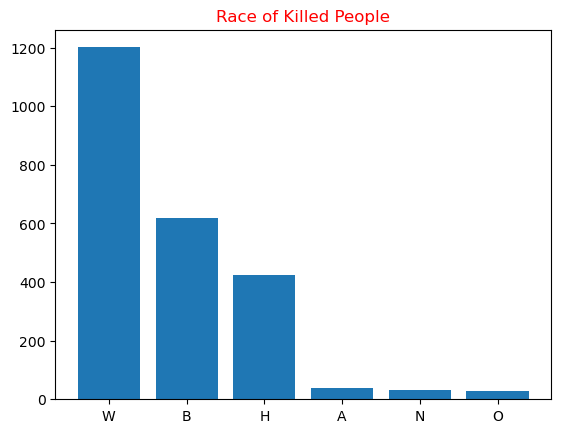

In [22]:
k = np.array(kill["race"].value_counts())
kk = np.array(kill["race"].value_counts().index)
plt.bar(kk, k)
plt.title("Race of Killed People", color="r")
plt.show()

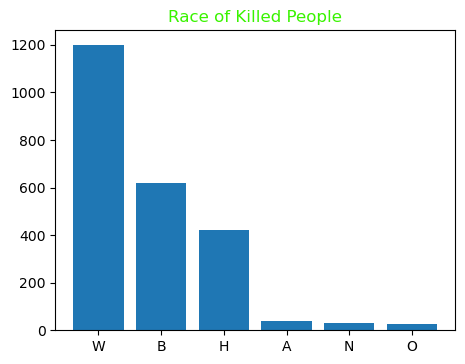

In [23]:
fig = plt.figure(figsize=(4,3))
ax= fig.add_axes([0,0,1,1])
ax.bar(race_index,race_value)
ax.set_title("Race of Killed People", color="#39f300")


plt.show()

## 5: Killed People According to Races (Pie Chart)

In [24]:
kill.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,age_cat
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,above25
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,above25
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,below25
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,above25
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False,above25


In [25]:
kill.race.unique()

array(['A', 'W', 'H', 'B', 'O', nan, 'N'], dtype=object)

In [26]:
kill.race.value_counts(dropna=False)

W      1201
B       618
H       423
NaN     195
A        39
N        31
O        28
Name: race, dtype: int64

Problem: missing value on race column.

**INSTRUCTION-1: Drop the all raws that contain missing value (dropna)**

In [27]:
kill.isnull().sum()

id                           0
name                         0
date                         0
manner_of_death              0
armed                        9
age                         77
gender                       0
race                       195
city                         0
state                        0
signs_of_mental_illness      0
threat_level                 0
flee                        65
body_camera                  0
age_cat                      0
dtype: int64

In [28]:
kill.shape

(2535, 15)

In [29]:
kill.dropna(how="any",inplace=True)

In [30]:
kill.shape

(2254, 15)

**INSTRUCTION-2: Demonstrate Race Ratio of Killed People by a Pie Chart (You can use Matplotlib)**

In [31]:
kill.race.value_counts()

W    1168
B     592
H     401
A      36
N      29
O      28
Name: race, dtype: int64

In [32]:
label= kill.race.value_counts().index
label

Index(['W', 'B', 'H', 'A', 'N', 'O'], dtype='object')

In [33]:
np.array(kill.race.value_counts())


array([1168,  592,  401,   36,   29,   28], dtype=int64)

In [34]:
x = kill.race.value_counts(normalize=True) 
x

W    0.518190
B    0.262644
H    0.177906
A    0.015972
N    0.012866
O    0.012422
Name: race, dtype: float64

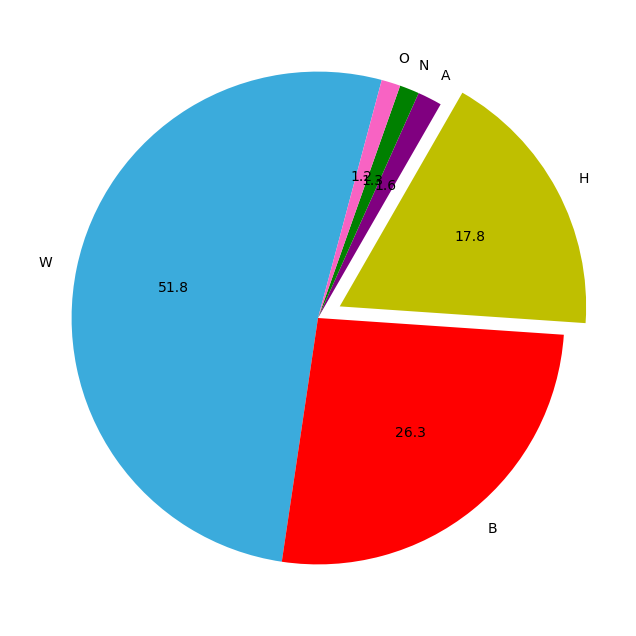

In [35]:
plt.figure(figsize=(10,8))
color_list =["#3babdc","r","y","purple","g","#f863c3"]
explode_list= [0,0,0.1,0,0,0]
plt.pie(x,labels=label,autopct="%.1f",startangle=75,explode=explode_list,colors=color_list)

plt.show()

6-Most common 15 Name or Surname of killed people

In [36]:
kill["first_name"] = kill.name.apply(lambda x : x.split(" ")[0])

In [45]:
kill["second_name1"] = kill.name.apply(lambda x : x.split(" ")[-1])

In [51]:
kill.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,age_cat,first_name,second_name1
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,above25,Tim,Elliot
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,above25,Lewis,Lembke
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,below25,John,Quintero
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,above25,Matthew,Hoffman
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False,above25,Michael,Rodriguez


In [60]:
name_value = pd.Series(kill.first_name.value_counts()[:15])
name_value

Michael        68
David          43
James          39
Robert         37
William        35
John           33
Richard        31
Daniel         31
Joseph         30
Christopher    30
Joshua         26
Jose           22
Jason          21
Matthew        20
Charles        20
Name: first_name, dtype: int64

In [63]:
name_index = list(kill.first_name.value_counts()[:15].index)
name_index

['Michael',
 'David',
 'James',
 'Robert',
 'William',
 'John',
 'Richard',
 'Daniel',
 'Joseph',
 'Christopher',
 'Joshua',
 'Jose',
 'Jason',
 'Matthew',
 'Charles']

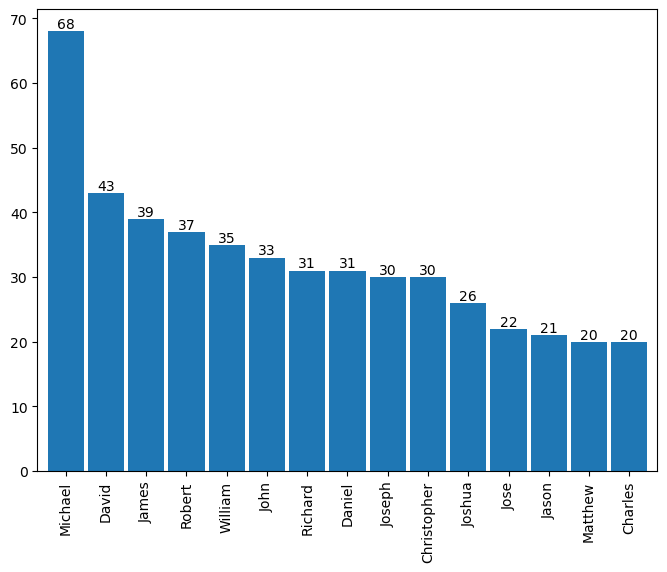

In [66]:
plt.figure(figsize=(8,6))
ax= fig.add_axes([0,0,1,1])
ax= name_value.plot(kind="bar",width=0.9)
ax.set_xticklabels(name_index,rotation=90)
for i in range(len(name_index)):
    plt.text(i,name_value[i], str(name_value[i]),va="bottom",ha="center")
plt.show()

In [69]:
second_name_value = pd.Series(kill.second_name1.value_counts()[:15])
second_name_value

Smith        31
Johnson      29
Jr.          18
Williams     16
Brown        14
Hall         13
Hernandez    13
Rodriguez    12
Anderson     12
Jones        12
Davis        12
Gonzalez     10
Harris       10
Martinez      9
III           9
Jackson       9
Garcia        9
Name: second_name1, dtype: int64

In [70]:
second_name_index = list(kill.second_name1.value_counts()[:15].index)
second_name_index

['Smith',
 'Johnson',
 'Jr.',
 'Williams',
 'Brown',
 'Hall',
 'Hernandez',
 'Rodriguez',
 'Anderson',
 'Jones',
 'Davis',
 'Gonzalez',
 'Harris',
 'Martinez',
 'III',
 'Jackson',
 'Garcia']

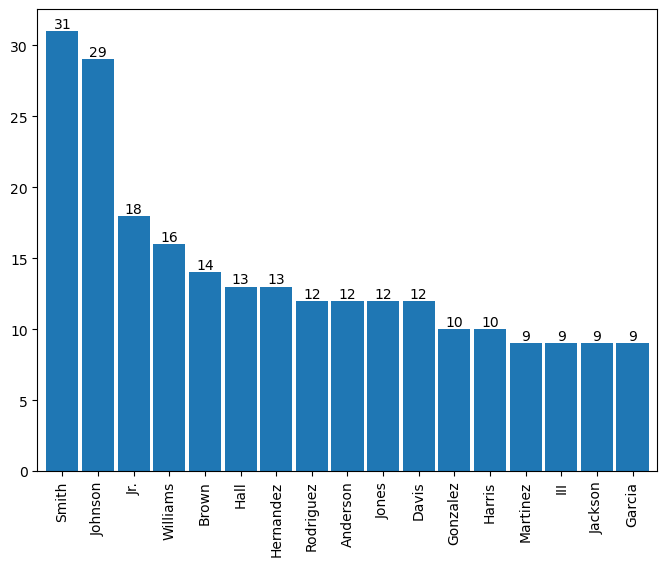

In [73]:
plt.figure(figsize=(8,6))
ax= fig.add_axes([0,0,1,1])
ax= second_name_value.plot(kind="bar",width=0.9)
ax.set_xticklabels(second_name_index,rotation=90)
for i in range(len(second_name_index)):
    plt.text(i,second_name_value[i], str(second_name_value[i]),va="bottom",ha="center")
plt.show()